## Using KNN classify Iris dataset

In [48]:
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
iris=load_iris()
X=iris.data
y=iris.target
print(iris.data.shape)
print(iris.target.shape)  # sklearn iris data is already divided in iris.data and iris.target

(150, 4)
(150,)


## Visualisation

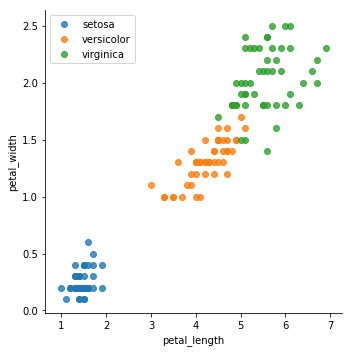

In [49]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
iris=sns.load_dataset("iris")
iris["ID"]=iris.index
iris["ratio"] = iris["sepal_length"]/iris["sepal_width"]
sns.lmplot(x="petal_length",y="petal_width",data=iris,hue="species",fit_reg=False,legend=False)
plt.legend()
plt.show()

## split data into training and testing set

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
neigh=neighbors.KNeighborsClassifier(n_neighbors=13,weights='uniform',algorithm='auto')


## Fitting and predicting data 

In [51]:
neigh=neigh.fit(X_train,y_train)
print(neigh.predict(X_test))
print(neigh.score(X_test,y_test))

[2 2 0 0 2 2 0 1 0 0 0 2 1 2 0 0 1 2 0 2 1 1 0 1 1 1 0 2 0 1 1 1 1 0 1 2 2
 1]
0.9736842105263158


## Getting optimal parameters

In [52]:
from sklearn.model_selection import GridSearchCV
k_range = range(1,31)
weight = ['uniform','distance']
param_grid = dict(n_neighbors=k_range, weights=weight)

In [53]:
neigh = neighbors.KNeighborsClassifier()
grid = GridSearchCV(neigh,param_grid,cv=10,scoring='accuracy')
grid.fit(X,y)
#Finally, lets print our best score and best parameters
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}
